<h1><center>Water Quality</center></h1>
<p><center>A Data Science project by <b>Aditya Kumar, Aditya Nayak & Kunal Inglunkar</b></center></p>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt # Interactive data viz package cmd: pip install altair
import pygwalker as pyg #Access tableau feature in python cmd: pip install pygwalker
from skimpy import skim, generate_test_data #Gives overall stats cmd: pip install skimpy
import sidetable # Better value_counts function cmd: pip install sidetable
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


<h2>About Dataset</h2>
<h3>Context:</h3>
<p>Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.</p>

<h3>Content</h3>
<p>The water_potability.csv file contains water quality metrics for 3276 different water bodies.</p>

<ol>
<li><b>pH value:</b></li>
<p>PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.</p>
<br>
<li><b>Hardness:</b></li>
<p>Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.</p>
<br>
<li><b>Solids (Total dissolved solids - TDS):</b></li>
<p>Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.</p>
<br>
<li><b>Chloramines:</b></li>
<p>Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.</p>
<br>
<li><b>Sulfate:</b></li>
<p>Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.</p>
<br>
<li><b>Conductivity:</b></li>
<p>Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.</p>
<br>
<li><b>Organic_carbon:</b></li>
<p>Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.</p>
<br>
<li><b>Trihalomethanes:</b></li>
<p>THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.</p>
<br>
<li><b>Turbidity:</b></li>
<p>The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.</p>
<br>
<li><b>Potability:</b></li>
<p>Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.</p>
</ol>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3276   │ │ float64     │ 9     │                                                          │
│ │ Number of columns │ 10     │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name           ┃ NA    ┃ NA %   ┃ mean    ┃ sd     ┃ p0     ┃ p25     ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ ph                    │   490 │     15 │     7.1 │    1.6 │      0 │     6.1 │     8.1 │      14 │   ▁██▁  │  │
│ │ Hardness              │     0 │      0 │     200 │     33 │     47 │     180 │     220 │     320 │   ▁▅█▂  │  │
│ │ Solids                │     0 │      0 │   22000 │   8800 │    320 │   16000 │   27000 │   61000 │  ▁█▇▂   │  │
│ │ Chloramines           │     0 │      0 │     7.1 │    1.6 │   0.35 │     6.1 │     8.1 │      13 │   ▁▆█▂  │  │
│ │ Sulfate               │   780 │     24 │     330 │     41 │    130 │     310 │     360 │     480 │    ▃█▃  │  │
│ │ Conductivity          │     0 │      0 │     430 │     81 │    180 │     370 │     480 │     750 │   ▅█▅▁  │  │
│ │ Organic_carbon        │     0 │      0 │      14 │    3.3 │    2.2 │      12 │      17 │      28 │   ▂█▆▁  │  │
│ │ Trihalomethanes       │   160 │    4.9 │      66 │     16 │   0.74 │      56 │      77 │     120 │   ▁▆█▂  │  │
│ │ Turbidity             │     0 │      0 │       4 │   0.78 │    1.4 │     3.4 │     4.5 │     6.7 │   ▃█▇▂  │  │
│ │ Potability            │     0 │      0 │    0.39 │   0.49 │      0 │       0 │       1 │       1 │ █    ▅  │  │
│ └───────────────────────┴───────┴────────┴─────────┴────────┴────────┴─────────┴─────────┴─────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

* From the following description of the dataset we observe that there are <b>missing values in ph, Sulfate &amp; Trihalomethanes.</b><br>
* Potability is a categorical variable which tells if the water is potable(1) or not potable(0).<br>
* Thus, converting the potability column from int to charecter.

In [7]:
def pot_label(p):
    if(p == 0):
        return 'No'
    else:
        return 'Yes'
    
df.Potability = df.Potability.apply(pot_label)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,No
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,No
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,No
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,No
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,No


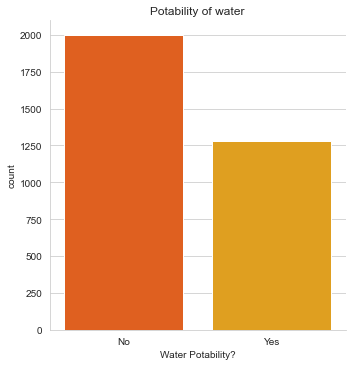

In [8]:
sns.set_style("whitegrid")
a = sns.catplot('Potability',kind = 'count',data = df ,palette='autumn')
a.set(xlabel ="Water Potability?", ylabel = "count", title ='Potability of water')

<AxesSubplot:xlabel='ph', ylabel='Potability'>

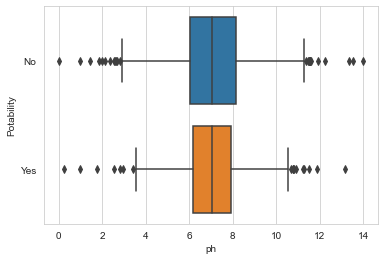

In [10]:
sns.boxplot(data=df, x="ph",y = 'Potability')

Text(0.5, 1.0, 'Violinplot of pH distribution')

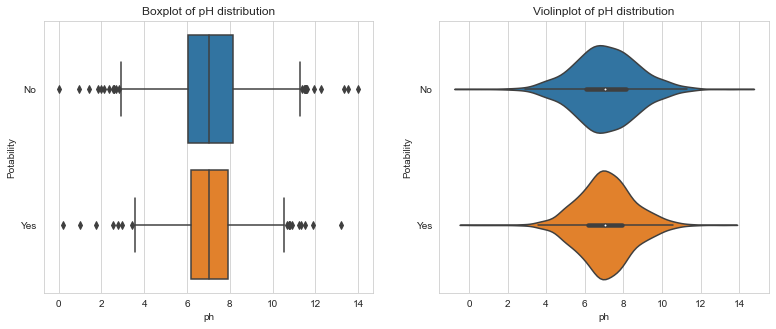

In [28]:
fig, (ax_box, ax_violin) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
sns.boxplot(x="ph", y="Potability", data=df, ax=ax_box)
sns.violinplot(x="ph", y="Potability", data=df, ax=ax_violin)
#sns.scatterplot(data=df, x='ph', y='Hardness', hue='Potability')
ax_box.set_title("Boxplot of pH distribution")
ax_violin.set_title("Violinplot of pH distribution")
#ax_scat_plot.set_title("pH vs. Hardness")

<AxesSubplot:>

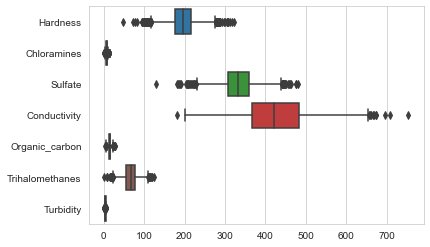

In [12]:
sns.boxplot(data=df[['Hardness','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']], orient="h")

Text(0.5, 1.0, 'Distribution of Chloramines(ppm), Organic Carbon(ppm) & Turbidity(NTU)')

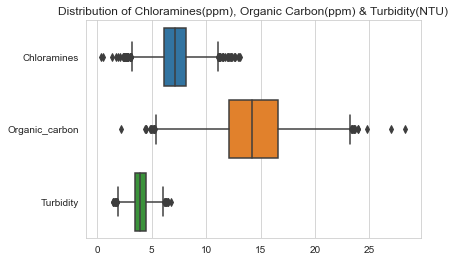

In [37]:
sns.boxplot(data=df[['Chloramines','Organic_carbon','Turbidity']],orient="h")
plt.title("Distribution of Chloramines(ppm), Organic Carbon(ppm) & Turbidity(NTU)")

Text(0.5, 1.0, 'Distribution of Sulfates(mg/L) & Conductivity(μS/cm)')

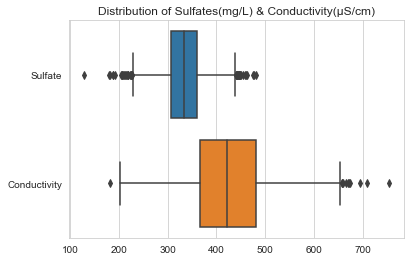

In [38]:
sns.boxplot(data=df[['Sulfate','Conductivity']],orient="h")
plt.title("Distribution of Sulfates(mg/L) & Conductivity(μS/cm)")

Text(0.5, 1.0, 'Distribution of Total Dissolved Solids(ppm)')

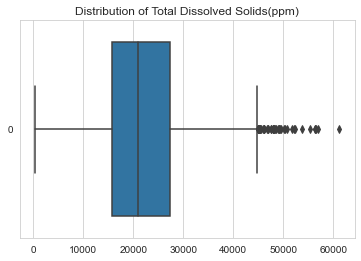

In [39]:
sns.boxplot(data=df.Solids,orient="h")
plt.title("Distribution of Total Dissolved Solids(ppm)")

<p> From the following 

In [30]:
chart = alt.Chart(df).mark_bar().encode(
    alt.X('ph:Q',bin = True,axis = alt.Axis(title="pH value")),
    alt.Y('count()', axis = alt.Axis(title="count"))).properties(title="Distribution of pH values")
chart

alt.Chart(...)

<p>As the distrbution of ph values is normal, we can take the mean value of the pH distribution

In [31]:
chart1 = alt.Chart(df).mark_bar().encode(
    alt.X('Sulfate:Q',bin = True,axis = alt.Axis(title="Sulfate value (mg\L)")),
    alt.Y('count()', axis = alt.Axis(title="count"))).properties(title="Distribution of Sulfate values")
chart1

alt.Chart(...)

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)

In [ ]:
df1 = df[df.ph < 7]
df1.head()

In [ ]:
df2 = df[df.ph > 7]
df2.head()

In [ ]:
df1.describe()

In [ ]:
df2.describe()

In [ ]:
skim(df1)

In [ ]:
skim(df2)

In [ ]:
null_mask = df['ph'].isnull()

# Use the boolean mask to subset the dataframe
subset_df = df[null_mask]

subset_df

In [ ]:
skim(subset_df)

In [ ]:
subset_df.stb.freq(["Chloramines"], style = True)

In [ ]:
corr_matrix1 = df1.corr()
sns.heatmap(corr_matrix1, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)

In [ ]:
corr_matrix2 = df2.corr()
sns.heatmap(corr_matrix2, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)

In [ ]:
from sklearn.preprocessing import StandardScaler

X1 = df.copy()

scaler = StandardScaler()
scaler.fit(X1)
Xa = scaler.transform(X1)
Xa[0:5]

In [ ]:
df.head()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
dfq = pd.DataFrame(Xa,columns=df.columns)
dfq= dfq.dropna()

# Select only the predictor variables you want to check for multicollinearity
predictors = dfq[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]

# Create a numpy array from the predictor variables
X = np.array(predictors)

# Calculate the VIF values for each predictor variable
vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

# Print the VIF values
print(vif)
# From this part we understand that  there is high multicolinearity within the features. Especially for missing values like
# pH, Sulfates & trihalomethanes. where VIF > 10 indicating that other features can be made use of to predict these features.

<p>From this part we understand that  there is high multicolinearity within the features. Especially for missing values like
 pH, Sulfates &amp; trihalomethanes. where VIF > 10 indicating that other features can be made use of to predict these features.</p>

In [ ]:
dfq.head()

In [ ]:
clean_ph = pd.concat([df1,df2],ignore_index = True)
clean_ph.head()

In [ ]:
skim(clean_ph)

In [ ]:
X1 = X1.dropna()
X1

In [ ]:
dfg = df[(df.Potability == 1)&(df.ph < 4)]
dfg

In [ ]:
alt.Chart(df).mark_circle(size=60).encode(
    x='ph',
    y='Hardness',
    color=alt.Color('Potability:O',scale = alt.Scale(scheme='turbo')),
    tooltip=['Solids:Q', 'Chloramines:Q', 'Conductivity:Q', 'Organic_carbon:Q']
)

<p>On dividing the dataset into acidic and basic sub-datasets we can observe that there are values that do not make sense. For instance, the data states that a pH value of 4 is drinkable.<br>
Also, there is an instance of </p>

In [ ]:
alt.Chart(df).mark_circle(size=60).encode(
    x='ph',
    y='Sulfate',
    color=alt.Color('Potability:O',scale = alt.Scale(scheme='turbo')),
    tooltip=['Solids:Q', 'Chloramines:Q', 'Conductivity:Q', 'Organic_carbon:Q']
)